In [1]:
import numpy as np
from numpy.linalg import norm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# |Figure 4.14 shows 20 data points in two classes R^2. 
# |These data can be separated by a linear boundary.
points = np.array([[ 65, 410,   1], [331, 479,   1], [483, 483,   1], 
                   [318, 410,   1], [187, 348,   1], [192, 310,   1],
                   [223, 234,   1], [270, 241,   1], [339, 254,   1],
                   [303, 209,   1],
                   [168, 244,  -1], [222, 192,  -1], [168, 213,  -1],
                   [ 16, 214,  -1], [197, 180,  -1], [ 48, 120,  -1],
                   [ 91, 110,  -1], [192,  79,  -1], [219, 107,  -1],
                   [223,  66,  -1]])
X, Y = points[:,:2], points[:,2]
colors = np.array(['red', '', 'green'])[Y+1]

In [3]:
def plot_separating_line(b0, b1, b2):
    fig, ax1 = plt.subplots(figsize=(3.35, 3.1), dpi=110)
    ax1.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    ax1.scatter(points[:,0], points[:,1], color=colors, s=8)
    ax1.plot([-10, 510], [-(b0-10*b1)/b2, -(b0+510*b1)/b2], color='#E69E00', lw=1)
    ax1.set_xlim(-10, 510)
    ax1.set_ylim(50, 510)

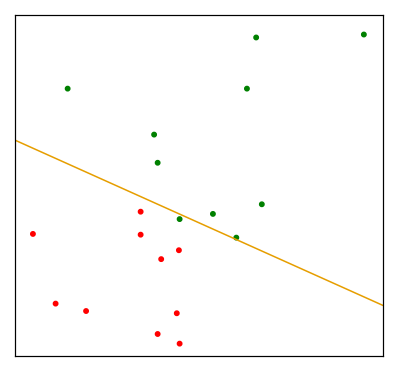

In [4]:
# |The orange line is the least squares solution to the problem, 
# |obtained by regressing the -1/1 response Y on X (with intercept); 
# |the line is given by {x: b0 + b1*x1 + b2*x2 = 0}.
reg = LinearRegression().fit(X, Y)
b0, b1, b2 = reg.intercept_, *reg.coef_
# |This least squares solution does not do a perfect job 
# |in separating the points, and makes one error.
plot_separating_line(b0, b1, b2)

In [5]:
# |The perceptron learning algorithm tries to find separating hyperplane
# |by minimizing the distance of missclassified points to the decision bounary.
p = 0.000001
for k in range(1000):
    has_misclassifications = False
    for i in range(points.shape[0]):
        if np.sign(X[i] @ np.array([b1, b2]) + b0) != Y[i]:            
            # |The algorithm in fact uses stochastic gradient descent to minimize this 
            # |piecewise linear criterion. This means that rather that computing the 
            # |sum of the dradient contributions of each observation followed by a step
            # |in the negative gradient direction, a step is taken after each observation
            # |is visited
            db = p * Y[i] * points[i] # delta b
            b0 += p* Y[i]
            b1 += db[0]
            b2 += db[1]
            has_misclassifications = True
    if not has_misclassifications:
        break
print('epochs', k)

epochs 1


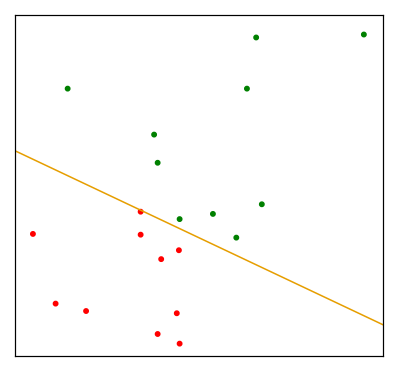

In [6]:
plot_separating_line(b0, b1, b2)

In [7]:
import cvxpy as cp

In [8]:
b0, b1, b2 = cp.Variable(), cp.Variable(), cp.Variable()
objective = cp.Minimize(0.5*(b1**2 + b2**2))
constraints = []
for i in range(X.shape[0]):
    constraints.append(Y[i]*(X[i,0]*b1+X[i,1]*b2+b0) >= 1)
prob = cp.Problem(objective, constraints)
result = prob.solve()
b0, b1, b2 = b0.value, b1.value, b2.value

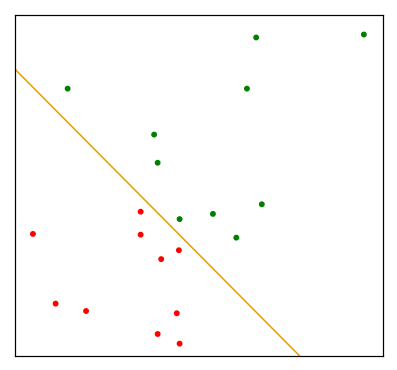

In [9]:
plot_separating_line(b0, b1, b2)